In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense
from tensorflow.keras.models import Model

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dataset = pd.read_csv('ratings.csv')

In [6]:
dataset.head()

book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4

In [7]:
dataset.shape

(981756, 3)

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [9]:
train.head()

book_id  user_id  rating
341848     3423     4608       2
964349     9811    36373       5
645459     6485     2957       4
74960       750    42400       3
358670     3591    36886       5

In [10]:
test.head()

book_id  user_id  rating
646451     6495    19643       5
614851     6175     8563       4
974393     9920    52110       3
21471       215    33864       5
272540     2728    16587       3

In [12]:
number_of_users = len(dataset.user_id.unique())
number_of_users

53424

In [13]:
number_of_books = len(dataset.book_id.unique())
number_of_books

10000

In [18]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(number_of_books + 1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(number_of_users + 1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

Epoch 1/5
24544/24544 [==============================] - 108s 4ms/step - loss: 14.3995
Epoch 2/5
24544/24544 [==============================] - 99s 4ms/step - loss: 6.3708
Epoch 3/5
24544/24544 [==============================] - 99s 4ms/step - loss: 2.4693
Epoch 4/5
24544/24544 [==============================] - 106s 4ms/step - loss: 1.4707
Epoch 5/5
24544/24544 [==============================] - 108s 4ms/step - loss: 1.1028


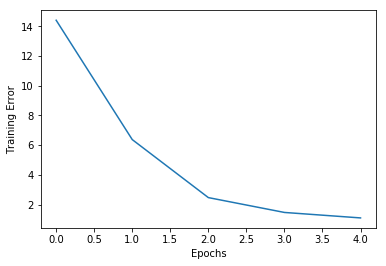

In [19]:
from tensorflow.keras.models import load_model

if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model.save('regression_model.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [20]:
model.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 [==============================] - 5s 781us/step - loss: 1.3962


1.3962339162826538

In [21]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[5.464306] 5
[4.084817] 4
[3.5865715] 3
[4.6642394] 5
[3.9516022] 3
[3.5767236] 3
[4.0498266] 3
[4.145269] 4
[4.5989084] 3
[3.9082143] 5


[None, None, None, None, None, None, None, None, None, None]

In [23]:
# Creating neural network

from tensorflow.keras.layers import Concatenate

# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(number_of_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(number_of_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([book_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, book_input], out)
model2.compile('adam', 'mean_squared_error')

Epoch 1/5
24544/24544 [==============================] - 120s 5ms/step - loss: 0.8033
Epoch 2/5
24544/24544 [==============================] - 122s 5ms/step - loss: 0.6886
Epoch 3/5
24544/24544 [==============================] - 130s 5ms/step - loss: 0.6608
Epoch 4/5
24544/24544 [==============================] - 126s 5ms/step - loss: 0.6356
Epoch 5/5
24544/24544 [==============================] - 118s 5ms/step - loss: 0.6149


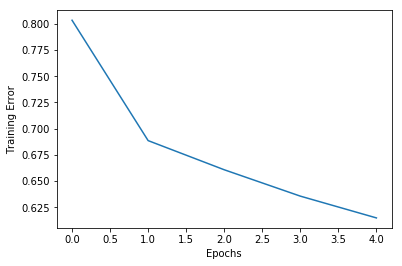

In [24]:
from tensorflow.keras.models import load_model

if os.path.exists('regression_model2.h5'):
    model2 = load_model('regression_model2.h5')
else:
    history = model2.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model2.save('regression_model2.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [25]:
model2.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 [==============================] - 5s 749us/step - loss: 0.7095


0.7094500660896301

In [26]:
predictions = model2.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[4.951755] 5
[3.7853413] 4
[3.5111575] 3
[4.0111485] 5
[3.5030456] 3
[3.5988622] 3
[3.6890225] 3
[4.8961844] 4
[4.096861] 3
[4.399862] 5


[None, None, None, None, None, None, None, None, None, None]

In [27]:
# Visualizing Embeddings
# Extract embeddings
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

In [28]:
book_em_weights[:5]

array([[ 0.01515801, -0.00346266, -0.0467267 ,  0.01166661,  0.01126551],
       [-1.63235   , -0.4412679 ,  0.9683841 , -1.1825634 ,  1.2633744 ],
       [-1.4541308 , -0.2610381 ,  1.2123286 , -1.2804574 ,  1.3965144 ],
       [-1.3365389 , -0.9095156 ,  0.5227119 , -0.698762  ,  0.8176449 ],
       [-1.5308071 ,  0.43731722,  0.9267836 , -1.3684175 ,  1.6089904 ]],
      dtype=float32)

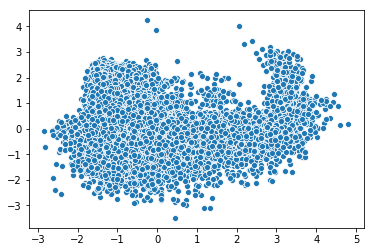

In [29]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [30]:
book_em_weights = book_em_weights / np.linalg.norm(book_em_weights, axis = 1).reshape((-1, 1))
book_em_weights[0][:10]
np.sum(np.square(book_em_weights[0]))

1.0000001

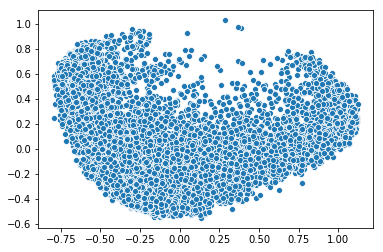

In [31]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(book_em_weights)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.014s...
[t-SNE] Computed neighbors for 10001 samples in 0.596s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 0.070082
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.717926
[t-SNE] KL

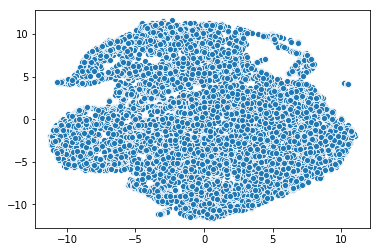

In [33]:
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

In [34]:
# Making Recommendations
# Creating dataset for making recommendations for the first user
book_data = np.array(list(set(dataset.book_id)))
book_data[:5]

array([1, 2, 3, 4, 5])

In [35]:
user = np.array([1 for i in range(len(book_data))])
user[:5]

array([1, 1, 1, 1, 1])

In [36]:
predictions = model.predict([user, book_data])

predictions = np.array([a[0] for a in predictions])

recommended_book_ids = (-predictions).argsort()[:5]

recommended_book_ids

array([7946, 7851, 8232, 8309, 6159], dtype=int64)

In [37]:
# print predicted scores
predictions[recommended_book_ids]

array([3.402347 , 3.3812723, 3.1715279, 3.1424909, 3.1404583],
      dtype=float32)

In [38]:
books = pd.read_csv('books.csv')
books.head()

id  book_id  best_book_id  work_id  books_count       isbn        isbn13  \
0   1  2767052       2767052  2792775          272  439023483  9.780439e+12   
1   2        3             3  4640799          491  439554934  9.780440e+12   
2   3    41865         41865  3212258          226  316015849  9.780316e+12   
3   4     2657          2657  3275794          487   61120081  9.780061e+12   
4   5     4671          4671   245494         1356  743273567  9.780743e+12   

                       authors  original_publication_year  \
0              Suzanne Collins                     2008.0   
1  J.K. Rowling, Mary GrandPré                     1997.0   
2              Stephenie Meyer                     2005.0   
3                   Harper Lee                     1960.0   
4          F. Scott Fitzgerald                     1925.0   

                             original_title  ... ratings_count  \
0                          The Hunger Games  ...       4780653   
1  Harry Potter and the Philosopher's Stone  ...       4602479   
2                                  Twilight  ...       3866839   
3                     To Kill a Mockingbird  ...       3198671   
4                          The Great Gatsby  ...       2683664   

  work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
0            4942365                   155254      66715     127936   
1            4800065                    75867      75504     101676   
2            3916824                    95009     456191     436802   
3            3340896                    72586      60427     117415   
4            2773745                    51992      86236     197621   

   ratings_3  ratings_4  ratings_5  \
0     560092    1481305    2706317   
1     455024    1156318    3011543   
2     793319     875073    1355439   
3     446835    1001952    1714267   
4     606158     936012     947718   

                                           image_url  \
0  https://images.gr-assets.com/books/1447303603m...   
1  https://images.gr-assets.com/books/1474154022m...   
2  https://images.gr-assets.com/books/1361039443m...   
3  https://images.gr-assets.com/books/1361975680m...   
4  https://images.gr-assets.com/books/1490528560m...   

                                     small_image_url  
0  https://images.gr-assets.com/books/1447303603s...  
1  https://images.gr-assets.com/books/1474154022s...  
2  https://images.gr-assets.com/books/1361039443s...  
3  https://images.gr-assets.com/books/1361975680s...  
4  https://images.gr-assets.com/books/1490528560s...  

[5 rows x 23 columns]

In [39]:
books[books['id'].isin(recommended_book_ids)]

id   book_id  best_book_id   work_id  books_count        isbn  \
6158  6159  25066591      25066591  44146594           34   316407135   
7850  7851   6076768       6076768   6253354           24  1416586571   
7945  7946     39926         39926    836516           43    60512180   
8231  8232     10395         10395     13106           31    60731427   
8308  8309    539282        539282     60745           17   452264014   

            isbn13          authors  original_publication_year  \
6158  9.780316e+12  James Patterson                     2015.0   
7850  9.781417e+12        Brad Thor                     2009.0   
7945  9.780061e+12       Naomi Wolf                     1990.0   
8231  9.780061e+12    Franklin Foer                     2004.0   
8308  9.780452e+12    August Wilson                     1986.0   

                                         original_title  ... ratings_count  \
6158                                      Cross Justice  ...          8634   
7850                                        The Apostle  ...         11267   
7945  The Beauty Myth: How Images of Beauty Are Used...  ...         13037   
8231  How Soccer Explains the World: An Unlikely The...  ...          9231   
8308                      Fences (The Century Cycle #6)  ...         11991   

     work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
6158              16401                     1490        210        472   
7850              12851                      517        117        375   
7945              14266                      790        234        790   
8231               9944                      716        246        669   
8308              12834                      882        269        943   

      ratings_3  ratings_4  ratings_5  \
6158       2241       6077       7401   
7850       2412       4964       4983   
7945       3493       5552       4197   
8231       2794       3715       2520   
8308       3198       4640       3784   

                                              image_url  \
6158  https://images.gr-assets.com/books/1427135714m...   
7850  https://s.gr-assets.com/assets/nophoto/book/11...   
7945  https://s.gr-assets.com/assets/nophoto/book/11...   
8231  https://s.gr-assets.com/assets/nophoto/book/11...   
8308  https://images.gr-assets.com/books/1481833774m...   

                                        small_image_url  
6158  https://images.gr-assets.com/books/1427135714s...  
7850  https://s.gr-assets.com/assets/nophoto/book/50...  
7945  https://s.gr-assets.com/assets/nophoto/book/50...  
8231  https://s.gr-assets.com/assets/nophoto/book/50...  
8308  https://images.gr-assets.com/books/1481833774s...  

[5 rows x 23 columns]